<a href="https://colab.research.google.com/github/SheikhMudassarHanif/NLP/blob/main/TextTranslationRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**I Will be Implementing text translation using Simple RNN and LSTM and compare their performance**

#IN this Implementation of RNN i have used lemmatized vocabulory

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#
# import tensorflow as tf
# from tensorflow import keras

In [20]:

excel_file_path = '/content/parallel-corpus.xlsx'
column_names = pd.read_excel(excel_file_path, nrows=0).columns.tolist()
df = pd.read_excel(excel_file_path,usecols=[column_names[0],column_names[1]])
df.dropna(inplace=True)
df.head()

,SENTENCES,MEANING
0,How can I communicate with my parents?,میں اپنے والدین سے کیسے بات کروں ؟
1,How can I make friends?’,میں دوست کیسے بنائوں ؟
2,Why do I get so sad?’,میں اتنا اداس کیوں ہوں؟.
3,"If you’ve asked yourself such questions, you’r...",اگر آپ نے اپنے آپ سے ایسے سوالات کیے ہیں، تو آ...
4,"Depending on where you’ve turned for guidance,...",اس بات پر منحصر ہے کہ آپ رہنمائی کے لیے کہاں ...


In [6]:
#run this
excel_file_path = '/preprocessed_data.csv'
column_names = pd.read_csv(excel_file_path, nrows=0).columns.tolist()
df = pd.read_csv(excel_file_path,usecols=[column_names[0],column_names[1]])
df.dropna(inplace=True)
df.head()

,SENTENCES,MEANING
0,how can I commun with my parent,م اپ والدین سے کیسا با کرنا
1,how can I make friend,م دوس کیسا بنائ
2,whi do I get so sad,م اتنا اداس کم ہ
3,if youv ask yourself such question your not alon,اگر اپ اپ اپ سے ایسا سوالا کرنا ہ ت اپ اکیلے نہ ہ
4,depend on where youv turn for guidanc you may ...,میں با پرنا منحصر ہونا کہنا اپ رہنمائ کم لینا ...


In [4]:
df.tail()

,SENTENCES,MEANING
29612,tasti food nice environ everyon should visit t...,لذیذ کھا اچھا ماحول ہرنا کسنا کو دوست اور کنبہ...
29613,thumb up,بہ خوب
29614,food wa awesom,کھا لاجواب تھا ۔
29615,econom place with a great tast a tough competi...,ایک عظیم ذائقہ کم ساتھ اقتصاد جگہ کراچ م نینڈو...
29616,food wa good but servic wa veri slow,کھا اچھا تھا لیکن سروس بہ سس ہونا ۔


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#spiliting the dataset in train=80% validation=10% test=10%

In [7]:
#dont run
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [6]:
len(train),len(val),len(test)

(23659, 2957, 2958)

Using Lughaat library to preprocess urdu language text

In [12]:
import re

In [ ]:
!pip install LughaatNLP

In [24]:

import re
from LughaatNLP import LughaatNLP
urdu_text_processing = LughaatNLP()

THis NOrmalize_label function is actually normalizing my urdu sentences in my dataset .
Stemming , removing accidental puntuctions , special charaters

In [25]:
#function used not need now updated in the file now reading again from the updated file
import re

def Normalize_label(text):
    # Check if the input is not a string
    if not isinstance(text, str):
        text = str(text)  # Convert it to a string

    # Preprocess the text
    urdu_text_processing.remove_special_characters_exceptUrdu(text)
    urdu_text_processing.remove_special_characters(text)
    urdu_text_processing.pure_urdu(text)
    urdu_text_processing.remove_diacritics(text)
    urdu_text_processing.punctuations_space(text)

    # Remove specific punctuation marks
    text = re.sub(r'[.,!?؟،؛,]', '', text)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    text=urdu_text_processing.remove_english(text)
    text=urdu_text_processing.remove_numbers(text)
    text=urdu_text_processing.normalize_characters(text)
    text=urdu_text_processing.normalize_combine_characters(text)
    text=urdu_text_processing.lemmatize_sentence(text)


    return text


In [26]:

df['MEANING']=df['MEANING'].apply(Normalize_label)

In [27]:
df['MEANING'].head()

,MEANING
0,میں اپنے والدین سے کیسے بات کروں
1,میں دوست کیسے بنائوں
2,میں اتنا اداس کیوں ہوں
3,اگر آپ نے اپنے آپ سے ایسے سوالات کیے ہیں تو آپ...
4,اس بات پر منحصر ہے کہ آپ رہنمائی کے لیے کہاں گ...


This Normalize_Input is normalizing my english sentences , preprocessing them stemming them removing accidental puntuctions, lowercasing and removing any unwanted text(urls)

In [ ]:
!pip install pyspellchecker
!pip install spacy
!pip install LughaatNLP


In [28]:
import re
from spellchecker import SpellChecker
import string
import spacy
nlp = spacy.load('en_core_web_sm')

spell = SpellChecker()

def Normalize_Input(text):
    # Check if the input is not a string
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to string

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
    text = re.sub(r'\d+', '', text)  # Removes numbers

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U0001F926-\U0001F937"
        u"\U00010000-\U0010ffff"
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    return text
    # Correct spelling, handling None values
    # words = text.split()
    # corrected_words = [spell.correction(word) or word for word in words]  # Keep original word if correction is None
    # text=' '.join(corrected_words)
    # Lemmatize the text
    # doc = nlp(text)
    # Return the lemmatized version of the text
    # return ' '.join([token.lemma_ for token in doc])


In [29]:
df['SENTENCES ']=df['SENTENCES '].apply(Normalize_Input)

In [30]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [31]:
df['SENTENCES ']=df['SENTENCES '].apply(remove_urls)

In [215]:
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    return ' '.join([token.lemma_ for token in doc])


In [216]:
df['SENTENCES ']=df['SENTENCES '].apply(lemmatize_sentence)

In [17]:
def correct_spellings(text):
    words = text.split()
    corrected_words = [spell.correction(word) or word for word in words]  # Keep original word if correction is None
    return ' '.join(corrected_words)

In [32]:
df['SENTENCES ']=df['SENTENCES '].apply(correct_spellings)

In [220]:
df.to_csv('preprocessed_data.csv',index=False)

In [33]:
df['SENTENCES '].head()

,SENTENCES
0,how can i communicate with my parents
1,how can i make friends
2,why do i get so sad
3,if youve asked yourself such questions youre n...
4,depending on where youve turned for guidance y...


#After normalizing the input and label

In [102]:
df.head()

,SENTENCES,MEANING
0,how can i commun with my parent,م اپ والدین سے کیسے با کر
1,how can i make friend,م دوس کیسے بنائ
2,whi do i get so sad,م اتنا اداس کی ہ
3,if youv ask yourself such question your not alon,اگر اپ اپ اپ سے ایسے سوالا کیے ہ تو اپ اکیلے نہ ہ
4,depend on where youv turn for guidanc you may ...,اس با پر منحصر ہے کہ اپ رہنمائ کے لیے کہاں گئے...


#conversion of data for nerual net processing

using the keras built-in tokenizer and pad_sequences
tokenizer converts the long sentences into tokens
pad_sequences ensure consistenty in the input length of sentences feeding to neural net

In [8]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Hyper parameters adjustment

In [10]:
vocab_size=7000
embedding_dim=50
max_length=500
trunc_type='post'
oov_tok='<OOV>'

Using the hyper parameters , seperated the sets of data and perfomed nerual net processing ,

1.   Tokeinzation
2.   Sequences
3.   padding



In [11]:
train_inputs=train['SENTENCES '].values
val_inputs=val['SENTENCES '].values
test_inputs=test['SENTENCES '].values


val_inputs_str=[str(x) for x in val_inputs]
test_inputs_str=[str(x) for x in test_inputs]
train_inputs_str = [str(x) for x in train_inputs]


#tokenization of input (english sentences)
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_inputs_str)

#vectorization of input

train_sequences = tokenizer.texts_to_sequences(train_inputs_str)
val_sequences = tokenizer.texts_to_sequences(val_inputs_str)
test_sequences = tokenizer.texts_to_sequences(test_inputs_str)

#Pad the sequences to ensure equal length
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [12]:
train_labels=train['MEANING'].values
train_labels = [str(x) for x in train_labels]
tokenizer.fit_on_texts(train_labels)
train_labels_sequences = tokenizer.texts_to_sequences(train_labels)
padded_train_labels = pad_sequences(train_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [13]:
val_labels=val['MEANING'].values
val_labels = [str(x) for x in val_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(val_labels)
val_labels_sequences = tokenizer.texts_to_sequences(val_labels)
padded_val_labels = pad_sequences(val_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [14]:
test_labels=test['MEANING'].values
test_labels = [str(x) for x in test_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(test_labels)
test_labels_sequences = tokenizer.texts_to_sequences(test_labels)
padded_test_labels = pad_sequences(test_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [15]:
padded_train_labels.shape,padded_val_labels.shape,padded_test_labels.shape

((23659, 500), (2957, 500), (2958, 500))

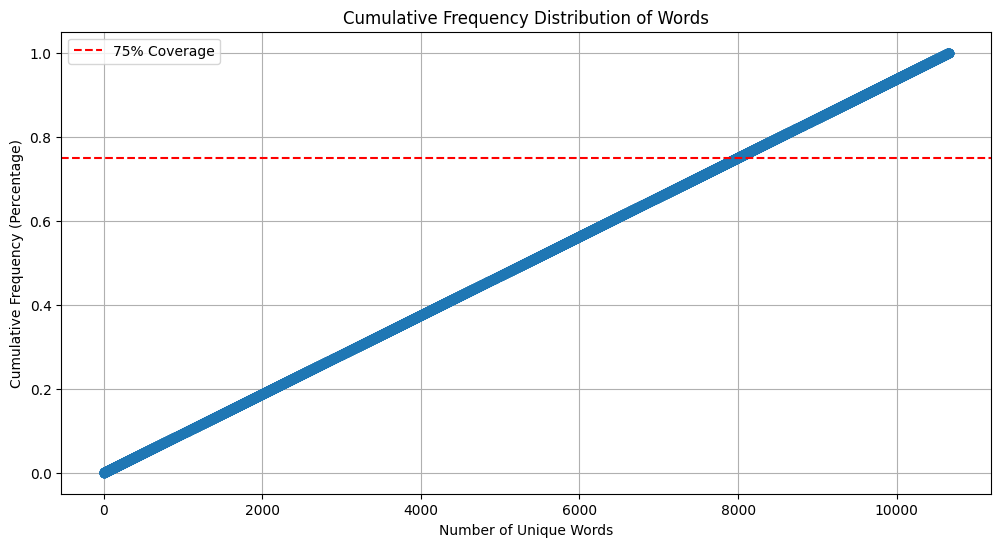

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter

# Load your training dataset
# train_data = pd.read_csv('your_train_dataset.csv')  # Adjust the filename as needed

# Combine all sentences into a single list
sentences = train['SENTENCES '].values  # Adjust the column name if necessary

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Get word frequency count
word_counts = Counter(tokenizer.word_index.keys())
word_freq = np.array(list(word_counts.values()))

# Sort frequencies
sorted_freq = np.sort(word_freq)[::-1]  # Sort in descending order

# Calculate cumulative frequency
cumulative_freq = np.cumsum(sorted_freq)

# Normalize the cumulative frequency
cumulative_freq_norm = cumulative_freq / cumulative_freq[-1]

# Plot the cumulative frequency distribution
plt.figure(figsize=(12, 6))
plt.plot(cumulative_freq_norm, marker='o')
plt.title('Cumulative Frequency Distribution of Words')
plt.xlabel('Number of Unique Words')
plt.ylabel('Cumulative Frequency (Percentage)')
plt.grid()
plt.axhline(y=0.75, color='r', linestyle='--', label='75% Coverage')
plt.legend()
plt.show()


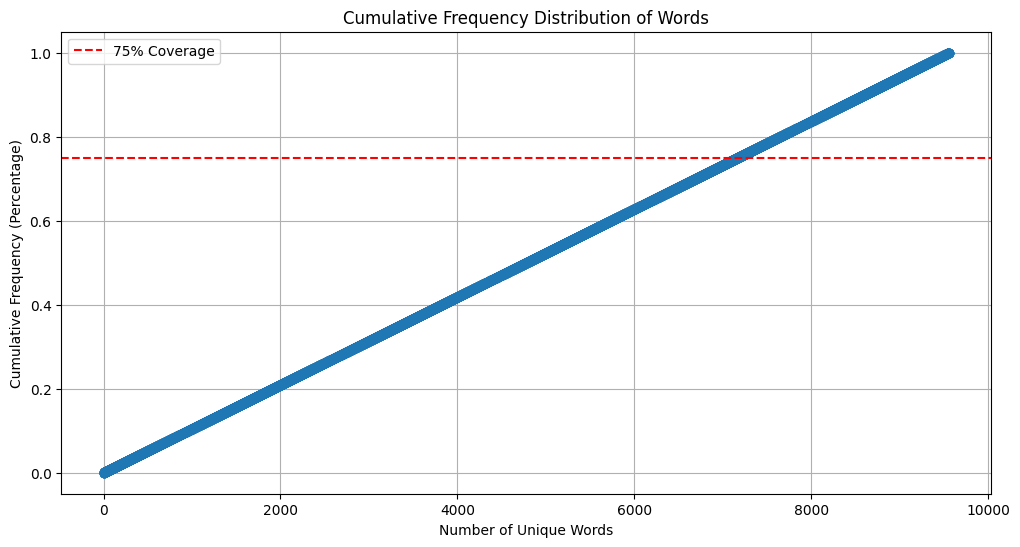

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter

# Load your training dataset
# train_data = pd.read_csv('your_train_dataset.csv')  # Adjust the filename as needed

# Combine all sentences into a single list
sentences = train['MEANING'].values  # Adjust the column name if necessary

# Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Get word frequency count
word_counts = Counter(tokenizer.word_index.keys())
word_freq = np.array(list(word_counts.values()))

# Sort frequencies
sorted_freq = np.sort(word_freq)[::-1]  # Sort in descending order

# Calculate cumulative frequency
cumulative_freq = np.cumsum(sorted_freq)

# Normalize the cumulative frequency
cumulative_freq_norm = cumulative_freq / cumulative_freq[-1]

# Plot the cumulative frequency distribution
plt.figure(figsize=(12, 6))
plt.plot(cumulative_freq_norm, marker='o')
plt.title('Cumulative Frequency Distribution of Words')
plt.xlabel('Number of Unique Words')
plt.ylabel('Cumulative Frequency (Percentage)')
plt.grid()
plt.axhline(y=0.75, color='r', linestyle='--', label='75% Coverage')
plt.legend()
plt.show()


In [18]:
sentences = train['SENTENCES '].values  # Adjust the column name if necessary

# Calculate the lengths of the sentences
train_input_lengths = [len(sentence.split()) for sentence in sentences]

# Find the maximum length
max_length = max(train_input_lengths)

print(f"The maximum length of a sentence is: {max_length} words")

The maximum length of a sentence is: 416 words


In [19]:
sentences = train['MEANING'].values  # Adjust the column name if necessary

# Calculate the lengths of the sentences
train_target_lengths = [len(sentence.split()) for sentence in sentences]

# Find the maximum length
max_length = max(train_target_lengths)

print(f"The maximum length of a sentence is: {max_length} words")

The maximum length of a sentence is: 889 words


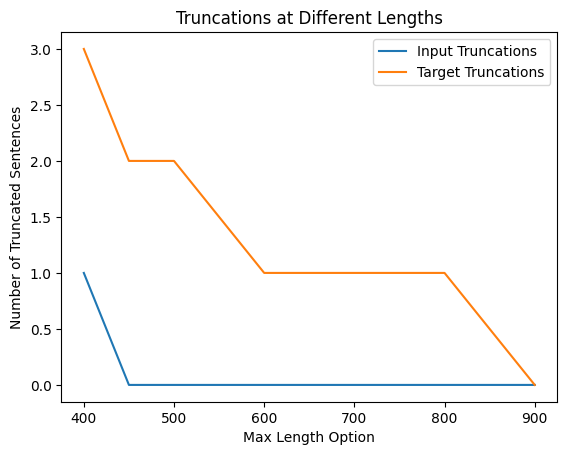

In [20]:
import numpy as np

# Assuming 'train_input_lengths' and 'train_target_lengths' are lists of lengths
train_input_lengths = [len(sentence.split()) for sentence in train['SENTENCES ']]
train_target_lengths = [len(sentence.split()) for sentence in train['MEANING']]

# Count truncations at different lengths
max_length_options = [400, 450, 500, 600, 700, 800, 900]
input_truncations = [sum(1 for length in train_input_lengths if length > option) for option in max_length_options]
target_truncations = [sum(1 for length in train_target_lengths if length > option) for option in max_length_options]

# Plotting truncations
import matplotlib.pyplot as plt

plt.plot(max_length_options, input_truncations, label='Input Truncations')
plt.plot(max_length_options, target_truncations, label='Target Truncations')
plt.xlabel('Max Length Option')
plt.ylabel('Number of Truncated Sentences')
plt.title('Truncations at Different Lengths')
plt.legend()
plt.show()


In [21]:
sentences = val['SENTENCES '].values  # Adjust the column name if necessary

# Calculate the lengths of the sentences
sentence_lengths = [len(sentence.split()) for sentence in sentences]

# Find the maximum length
max_length = max(sentence_lengths)

print(f"The maximum length of a sentence is: {max_length} words")

The maximum length of a sentence is: 275 words


##RNN nerual network architure below

this architure contains
5 layers
1 of RNN to capture the context in sequense of sentences
2 Dense Layers to increase the model complexitiy help it understand underlying patterns
1 dropout layer just to avoid overfitting
1 output layer with activation function of softmax as its best choice for multiclassification/translation

using adam as optimizer
and for loss calculation = sparse_categorical_crossentropy

Trying with LSTM architure

In [23]:
# # from keras_tuner import RandomSearch
# import tensorflow as tf


# # model architure defined

# model=tf.keras.Sequential([
#     #this layer makes the input ready for nerual network
#     tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length),
#     #LSTM layer
#     tf.keras.layers.LSTM(64,return_sequences=True),
#     #dropout layer
#     tf.keras.layers.Dropout(0.3),
#     #dense layer
#     tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     #dense output layer using softmax
#     tf.keras.layers.Dense(vocab_size,activation='softmax')



# ])

# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.summary()

# #defined callbacks to control the training flow epochs . such as if val_loss doesnt decrease stop . save the trained model and adjust the learning rate if needed
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),  # Stop early if val_loss doesn't improve
#     tf.keras.callbacks.ModelCheckpoint(filepath='best_model2.h5lstm.keras', save_best_only=True, monitor='val_loss', verbose=1),  # Save the best model
#   ]

# # Fit the model with callbacks
# historyRnn = model.fit(
#     train_padded, padded_train_labels,
#     batch_size=64, epochs=10,
#     validation_data=(val_padded, padded_val_labels),
#     callbacks=callbacks  # Add callbacks here
# )



In [25]:
# from keras_tuner import RandomSearch
import tensorflow as tf


# model architure defined

model=tf.keras.Sequential([
    #this layer makes the input ready for nerual network
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length),
    #RNN layer
    tf.keras.layers.SimpleRNN(128,return_sequences=True),
    #dropout layer
    tf.keras.layers.Dropout(0.3),
    #dense layer
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #dense output layer using softmax
    tf.keras.layers.Dense(vocab_size,activation='softmax')



])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

#defined callbacks to control the training flow epochs . such as if val_loss doesnt decrease stop . save the trained model and adjust the learning rate if needed
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),  # Stop early if val_loss doesn't improve
    tf.keras.callbacks.ModelCheckpoint(filepath='content/drive/MyDrive/Rnnbestmodel.keras', save_best_only=True, monitor='val_loss', verbose=1),  # Save the best model
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)  # Reduce learning rate if no improvement
]

# Fit the model with callbacks
historyRnn = model.fit(
    train_padded, padded_train_labels,
    batch_size=64, epochs=10,
    validation_data=(val_padded, padded_val_labels),
    callbacks=callbacks  # Add callbacks here
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9376 - loss: 2.2628 
Epoch 1: val_loss improved from inf to 0.37953, saving model to content/drive/MyDrive/Rnnbestmodel.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 4038s 11s/step - accuracy: 0.9377 - loss: 2.2594 - val_accuracy: 0.9697 - val_loss: 0.3795 - learning_rate: 0.0010
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9701 - loss: 0.2803 
Epoch 2: val_loss improved from 0.37953 to 0.29434, saving model to content/drive/MyDrive/Rnnbestmodel.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 4199s 11s/step - accuracy: 0.9701 - loss: 0.2803 - val_accuracy: 0.9698 - val_loss: 0.2943 - learning_rate: 0.0010
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9703 - loss: 0.2205 
Epoch 3: val_loss improved from 0.29434 to 0.29370, saving model to content/drive/MyDrive/Rnnbestmodel.keras
370/370 ━━━━━━━━━━━━━━━━━━━━ 4236s 11s/step - accuracy: 0.9703 - loss: 0.2205 - val_accuracy: 0.9698 - val_loss: 0.2937 - learni

KeyboardInterrupt: 

In [27]:

import pickle

# Save the tokenizer after fitting it on the training data
with open('content/drive/MyDrive/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


##SAVED My best model and loading it and using it.
At 4th Epoch the validation loss is 0.2670 but the at epoch 1 its 0.2503 . SO my best model which was saved to keras file was after the first epoch . now importing it and testing on test dataset and use it to translate text

In [158]:
model=tf.keras.models.load_model('/content/best_model.h5.keras')

## RNN performance on test data
#accuracy = 97 %
#loss = 25 %

In [ ]:
# new_data = ["hello how are you"]
# new_data=Normalize_Input(new_data)
# new_sequences = tokenizer.texts_to_sequences(new_data)
# new_padded = tf.keras.preprocessing.sequence.pad_sequences(new_sequences, maxlen=max_length, truncating=trunc_type)

# # Make predictions
# predictions = model.predict(new_padded)

# # View the prediction result
# print(predictions)

In [129]:
predicted_sequence = np.argmax(predictions, axis=-1)

# Convert the predicted sequence of indices back to words
predicted_sentence = [tokenizer.index_word.get(index, '<OOV>') for index in predicted_sequence[0]]

# Join the words to form a sentence
predicted_sentence_str = ' '.join(predicted_sentence)
print(predicted_sentence_str)

<OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV

In [125]:
def translate_english_to_urdu(input_text):
    # Step 1: Preprocess the input
    input_text = str(input_text)  # Ensure it's a string
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the input text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, truncating=trunc_type)  # Pad the sequence

    # Step 2: Predict the Urdu sequence
    prediction = model.predict(input_padded)  # Get the model's output (predicted token indices)

    # Step 3: Post-process the prediction
    # Get the index of the word with the highest probability at each time step
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Take the first sequence in the batch

    # Step 4: Convert the predicted token indices back to words
    urdu_translation = ''
    for token in predicted_sequence:
        if token != 0:  # Skip padding tokens
            word = tokenizer.index_word.get(token, '<OOV>')  # Convert index to word, or OOV if not found
            urdu_translation += word + ' '

    return urdu_translation.strip()  # Return the final translation

# Example usage:
english_input = "what are you doing?"
urdu_output = translate_english_to_urdu(english_input)
print(f"Input: {english_input} => Predicted Urdu Translation: {urdu_output}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
Input: what are you doing? => Predicted Urdu Translation: <OOV> <OOV> <OOV>


In [288]:

def Model_ready_input(text):
  text=str(text)
  text=Normalize_Input(text)
  text_sequence = tokenizer.texts_to_sequences([text])
  text_padded = pad_sequences(text_sequence, maxlen=max_length, truncating=trunc_type)
  return text_padded


In [163]:
model.evaluate(test_padded,padded_test_labels)


93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9364 - loss: 0.6235


[0.6053740978240967, 0.9382546544075012]

#Translating english to urdu

In [165]:
def translate_english_to_urdu(input_text):
    # Step 1: Preprocess the input
    input_text = str(input_text)  # Ensure it's a string
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the input text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, truncating=trunc_type)  # Pad the sequence

    # Step 2: Predict the Urdu sequence
    prediction = model.predict(input_padded)  # Get the model's output (predicted token indices)

    # Step 3: Post-process the prediction
    # Get the index of the word with the highest probability at each time step
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Take the first sequence in the batch

    # Step 4: Convert the predicted token indices back to words
    urdu_translation = ''
    for token in predicted_sequence:
        if token != 0:  # Skip padding tokens
            word = tokenizer.index_word.get(token, '<OOV>')  # Convert index to word, or OOV if not found
            urdu_translation += word + ' '

    return urdu_translation.strip()  # Return the final translation

# Example usage:
english_input = "How are you?"
urdu_output = translate_english_to_urdu(english_input)
print(f"Input: {english_input} => Predicted Urdu Translation: {urdu_output}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Input: How are you? => Predicted Urdu Translation: <OOV> <OOV>


##Testing on small dataset

In [297]:
import pandas as pd

# Create a DataFrame with 100 sentences
data = {
    'english': [
        "Hello, how are you?",
        "What is your name?",
        "I am learning.",
        "Where do you live?",
        "It is a beautiful day.",
        "I love reading books.",
        "How old are you?",
        "This is my favorite movie.",
        "Can you help me?",
        "Thank you very much!",
        "What time is it?",
        "I am feeling happy today.",
        "The weather is nice.",
        "Where are you going?",
        "I want to learn more.",
        "Do you speak English?",
        "She is my best friend.",
        "Can I get some water?",
        "I will meet you tomorrow.",
        "Please close the door.",
        "Where is the nearest restaurant?",
        "This is a difficult problem.",
        "I have a question for you.",
        "Can we go out tonight?",
        "He is a good person.",
        "I forgot my phone at home.",
        "We are having dinner now.",
        "I enjoy listening to music.",
        "The book was very interesting.",
        "He works in a big company.",
        "I am very tired today.",
        "Do you know the answer?",
        "I hope you have a good day.",
        "What is the price of this?",
        "She sings beautifully.",
        "We are going to the market.",
        "Can I borrow your pen?",
        "I am waiting for the bus.",
        "What did you say?",
        "I am studying for my exams.",
        "The food is very tasty.",
        "I am going to the gym.",
        "Where is your brother?",
        "I am watching a movie.",
        "Please pass me the salt.",
        "The baby is sleeping.",
        "It is raining outside.",
        "He is my younger brother.",
        "I need some help with this.",
        "I am visiting my grandparents.",
        "She is wearing a red dress.",
        "I will be back soon.",
        "Are you coming to the party?",
        "The meeting is at 10 AM.",
        "I am going on a trip next week.",
        "The flowers are beautiful.",
        "I need to go to the bank.",
        "The sun is shining brightly.",
        "I will call you later.",
        "She is reading a book.",
        "We are going on vacation.",
        "The car is parked outside.",
        "I like playing football.",
        "The house is very big.",
        "I am cooking dinner.",
        "The sky is clear today.",
        "I lost my wallet.",
        "The cake is delicious.",
        "Can you come with me?",
        "I need to buy some groceries.",
        "She is talking to her friend.",
        "The cat is sitting on the chair.",
        "I am learning a new language.",
        "He is writing a letter.",
        "I am going to bed now.",
        "Please turn off the lights.",
        "I need to finish my homework.",
        "We are going to the park.",
        "I am working on a project.",
        "The children are playing outside.",
        "She is baking a cake.",
        "I am looking for my keys.",
        "The train is arriving soon.",
        "The meeting has been canceled.",
        "Can you lend me some money?",
        "I am planning a party.",
        "The dog is barking loudly.",
        "She is wearing glasses.",
        "I am cleaning the house.",
        "The news is very important.",
        "We are going to the beach.",
        "I am feeling a little sick.",
        "The exam was difficult.",
        "I am going to visit a friend.",
        "The street is very busy.",
        "I have finished my work.",
        "I am going to the doctor.",
        "The plane is taking off.",
        "I am sending an email.",
        "He is driving the car.",
        "We are moving to a new house.",
        "The restaurant is very crowded.",
        "I am learning to play the guitar.",
        "I am going to the library.",
        "He is swimming in the pool."
    ],
    'urdu': [
        "ہیلو، آپ کیسے ہیں؟",
        "آپ کا نام کیا ہے؟",
        "میں سیکھ رہا ہوں۔",
        "آپ کہاں رہتے ہیں؟",
        "یہ ایک خوبصورت دن ہے۔",
        "مجھے کتابیں پڑھنا پسند ہے۔",
        "آپ کی عمر کیا ہے؟",
        "یہ میری پسندیدہ فلم ہے۔",
        "کیا آپ میری مدد کر سکتے ہیں؟",
        "آپ کا بہت شکریہ!",
        "کتنا وقت ہوا ہے؟",
        "آج میں خوش محسوس کر رہا ہوں۔",
        "موسم اچھا ہے۔",
        "آپ کہاں جا رہے ہیں؟",
        "میں مزید سیکھنا چاہتا ہوں۔",
        "کیا آپ انگریزی بولتے ہیں؟",
        "وہ میری بہترین دوست ہے۔",
        "کیا مجھے کچھ پانی مل سکتا ہے؟",
        "میں کل آپ سے ملوں گا۔",
        "براہ کرم دروازہ بند کر دیں۔",
        "سب سے قریبی ریستوران کہاں ہے؟",
        "یہ ایک مشکل مسئلہ ہے۔",
        "میرے پاس آپ کے لئے ایک سوال ہے۔",
        "کیا ہم آج رات باہر جا سکتے ہیں؟",
        "وہ ایک اچھا انسان ہے۔",
        "میں نے اپنا فون گھر بھول گیا ہوں۔",
        "ہم ابھی رات کا کھانا کھا رہے ہیں۔",
        "مجھے موسیقی سننا پسند ہے۔",
        "یہ کتاب بہت دلچسپ تھی۔",
        "وہ ایک بڑی کمپنی میں کام کرتا ہے۔",
        "آج میں بہت تھکا ہوا ہوں۔",
        "کیا آپ جواب جانتے ہیں؟",
        "میں امید کرتا ہوں کہ آپ کا دن اچھا گزرے۔",
        "اس کی قیمت کیا ہے؟",
        "وہ بہت خوبصورت گاتی ہے۔",
        "ہم بازار جا رہے ہیں۔",
        "کیا میں آپ کا قلم لے سکتا ہوں؟",
        "میں بس کے انتظار میں ہوں۔",
        "آپ نے کیا کہا؟",
        "میں اپنے امتحانات کی تیاری کر رہا ہوں۔",
        "کھانا بہت لذیذ ہے۔",
        "میں جم جا رہا ہوں۔",
        "آپ کا بھائی کہاں ہے؟",
        "میں فلم دیکھ رہا ہوں۔",
        "براہ کرم مجھے نمک دے دیں۔",
        "بچہ سو رہا ہے۔",
        "باہر بارش ہو رہی ہے۔",
        "وہ میرا چھوٹا بھائی ہے۔",
        "مجھے اس میں کچھ مدد کی ضرورت ہے۔",
        "میں اپنے دادا دادی سے ملنے جا رہا ہوں۔",
        "وہ ایک سرخ لباس پہنی ہوئی ہے۔",
        "میں جلد واپس آؤں گا۔",
        "کیا آپ پارٹی میں آ رہے ہیں؟",
        "میٹنگ صبح 10 بجے ہے۔",
        "میں اگلے ہفتے ایک سفر پر جا رہا ہوں۔",
        "پھول بہت خوبصورت ہیں۔",
        "مجھے بینک جانا ہے۔",
        "سورج چمک رہا ہے۔",
        "میں بعد میں آپ کو کال کروں گا۔",
        "وہ کتاب پڑھ رہی ہے۔",
        "ہم چھٹی پر جا رہے ہیں۔",
        "گاڑی باہر کھڑی ہے۔",
        "مجھے فٹ بال کھیلنا پسند ہے۔",
        "گھر بہت بڑا ہے۔",
        "میں رات کا کھانا بنا رہا ہوں۔",
        "آج آسمان صاف ہے۔",
        "میں نے اپنا بٹوہ کھو دیا ہے۔",
        "کیک بہت مزیدار ہے۔",
        "کیا آپ میرے ساتھ آ سکتے ہیں؟",
        "مجھے کچھ سودا سلف خریدنے کی ضرورت ہے۔",
        "وہ اپنی دوست سے بات کر رہی ہے۔",
        "بلی کرسی پر بیٹھی ہے۔",
        "میں ایک نئی زبان سیکھ رہا ہوں۔",
        "وہ ایک خط لکھ رہا ہے۔",
        "میں اب سونے جا رہا ہوں۔",
        "براہ کرم لائٹس بند کر دیں۔",
        "مجھے اپنا ہوم ورک مکمل کرنا ہے۔",
        "ہم پارک جا رہے ہیں۔",
        "میں ایک منصوبے پر کام کر رہا ہوں۔",
        "بچے باہر کھیل رہے ہیں۔",
        "وہ کیک بنا رہی ہے۔",
        "میں اپنی چابیاں تلاش کر رہا ہوں۔",
        "ٹرین جلد ہی پہنچ رہی ہے۔",
        "میٹنگ منسوخ کر دی گئی ہے۔",
        "کیا آپ مجھے کچھ پیسے دے سکتے ہیں؟",
        "میں ایک پارٹی کی منصوبہ بندی کر رہا ہوں۔",
        "کتا زور سے بھونک رہا ہے۔",
        "وہ عینک پہنے ہوئے ہے۔",
        "میں گھر کی صفائی کر رہا ہوں۔",
        "خبریں بہت اہم ہیں۔",
        "ہم سمندر کنارے جا رہے ہیں۔",
        "مجھے تھوڑا سا بیمار محسوس ہو رہا ہے۔",
        "امتحان مشکل تھا۔",
        "میں ایک دوست سے ملنے جا رہا ہوں۔",
        "سڑک بہت مصروف ہے۔",
        "میں نے اپنا کام مکمل کر لیا ہے۔",
        "میں ڈاکٹر کے پاس جا رہا ہوں۔",
        "جہاز اڑان بھر رہا ہے۔",
        "میں ای میل بھیج رہا ہوں۔",
        "وہ گاڑی چلا رہا ہے۔",
        "ہم ایک نئے گھر میں منتقل ہو رہے ہیں۔",
        "ریستوران بہت بھیڑ بھرا ہے۔",
        "میں گٹار سیکھ رہا ہوں۔",
        "میں لائبریری جا رہا ہوں۔",
        "وہ سوئمنگ پول میں تیر رہا ہے۔"
    ]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('english_urdu_corpus_100.csv', index=False)


In [298]:
df.head()

,english,urdu
0,"Hello, how are you?",ہیلو، آپ کیسے ہیں؟
1,What is your name?,آپ کا نام کیا ہے؟
2,I am learning.,میں سیکھ رہا ہوں۔
3,Where do you live?,آپ کہاں رہتے ہیں؟
4,It is a beautiful day.,یہ ایک خوبصورت دن ہے۔


In [299]:
df['english']=df['english'].apply(Normalize_Input)
df['urdu']=df['urdu'].apply(Normalize_label)

In [300]:
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [301]:
vocab_size=10000
embedding_dim=50
max_length=200
trunc_type='post'
oov_tok='<OOV>'
train_inputs=train['english'].values
val_inputs=val['english'].values
test_inputs=test['english'].values


val_inputs_str=[str(x) for x in val_inputs]
test_inputs_str=[str(x) for x in test_inputs]
train_inputs_str = [str(x) for x in train_inputs]


#tokenization of input (english sentences)
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_inputs_str)

#vectorization of input

train_sequences = tokenizer.texts_to_sequences(train_inputs_str)
val_sequences = tokenizer.texts_to_sequences(val_inputs_str)
test_sequences = tokenizer.texts_to_sequences(test_inputs_str)

#Pad the sequences to ensure equal length
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)


In [302]:
train_labels=train['urdu'].values
train_labels = [str(x) for x in train_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_labels)
train_labels_sequences = tokenizer.texts_to_sequences(train_labels)
padded_train_labels = pad_sequences(train_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [303]:
val_labels=val['urdu'].values
val_labels = [str(x) for x in val_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(val_labels)
val_labels_sequences = tokenizer.texts_to_sequences(val_labels)
padded_val_labels = pad_sequences(val_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [304]:
test_labels=test['urdu'].values
test_labels = [str(x) for x in test_labels]
# tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(test_labels)
test_labels_sequences = tokenizer.texts_to_sequences(test_labels)
padded_test_labels = pad_sequences(test_labels_sequences, maxlen=max_length, truncating=trunc_type)

In [305]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),



    tf.keras.layers.Dense(128, activation='tanh'),

    # First LSTM layer
    tf.keras.layers.LSTM(64, return_sequences=True),

    # Second LSTM layer
    tf.keras.layers.LSTM(128, return_sequences=True),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    # Output layer for vocabulary size
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [307]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_padded,
    np.expand_dims(padded_train_labels, -1),
    batch_size=32,
    epochs=100,
    validation_data=(val_padded, padded_val_labels),
    callbacks=[early_stopping]
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9646 - loss: 0.8391 - val_accuracy: 0.9695 - val_loss: 0.7896
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9643 - loss: 0.7977 - val_accuracy: 0.9695 - val_loss: 0.7541
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9648 - loss: 0.7582 - val_accuracy: 0.9695 - val_loss: 0.7252
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9645 - loss: 0.7330 - val_accuracy: 0.9695 - val_loss: 0.7013
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9637 - loss: 0.7138 - val_accuracy: 0.9695 - val_loss: 0.6810
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9650 - loss: 0.6827 - val_accuracy: 0.9695 - val_loss: 0.6634
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9647 - loss: 0.6671 - val_accuracy: 0.9695 - val_loss: 0.6480
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9647 - loss: 0.6500 - val_accuracy: 0.9695 - val_loss: 0.6342
Epoc

In [201]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),  # Simple RNN layer
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    # Another Simple RNN layer
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
    # tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))  # Output layer for each time step
])

In [202]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [308]:
model.evaluate(test_padded,padded_test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.9709 - loss: 0.3697


[0.3697379231452942, 0.9709091186523438]

In [310]:
def translate_english_to_urdu(input_text):
    # Step 1: Preprocess the input
    input_text = str(input_text)  # Ensure it's a string
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the input text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, truncating=trunc_type)  # Pad the sequence

    # Step 2: Predict the Urdu sequence
    prediction = model.predict(input_padded)  # Get the model's output (predicted token indices)

    # Step 3: Post-process the prediction
    # Get the index of the word with the highest probability at each time step
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Take the first sequence in the batch

    # Step 4: Convert the predicted token indices back to words
    urdu_translation = ''
    for token in predicted_sequence:
        if token != 0:  # Skip padding tokens
            word = tokenizer.index_word.get(token, '<OOV>')  # Convert index to word, or OOV if not found
            urdu_translation += word + ' '

    return urdu_translation.strip()  # Return the final translation

# Example usage:
english_input = "what are you doing?"
urdu_output = translate_english_to_urdu(english_input)
print(f"Input: {english_input} => Predicted Urdu Translation: {urdu_output}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Input: what are you doing? => Predicted Urdu Translation: 
